###  Test the learning rate

 2020-11-20
 
     use tf.keras.callbacks.LearningRateScheduler for epoch wise lr
 
 2021-12-20 note
 
     use tf.keras.optimizers.schedules.LearningRateSchedule  for step wise lr
     note that use tf.keras.optimizers.schedules.LearningRateSchedule need added within optimizer = tf.keras.optimizers.Adam(learning_rate=scheduled_lr) not in the callback[].
     And, when save_model, need overwrite the get_conf!
 
 2021-12-20 add
 very small epoch lr example
 
     NOTE THAT: AttributeError: module 'tensorflow.keras.experimental' has no attribute 'LinearCosineDecay'
             tf.250 remove many experimental modules!!
             use tf.keras.optimizers.schedules.CosineDecay but keep in mind, repalce steps as epochs!!

In [2]:
import tensorflow as tf
from datetime import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

2021-12-26 16:16:36.666592: I tensorflow/stream_executor/platform/default/dso_loader.cc:54] Successfully opened dynamic library libcudart.so.11.0


## lr (Epochwise: callback)

e0    lr: 1e-07
e50   lr: 1.5683121854901685e-07
e100  lr: 2.4596031111569494e-07
e150  lr: 3.8574255306969737e-07
e200  lr: 6.049647464412945e-07
e250  lr: 9.487735836358526e-07
e300  lr: 1.474641496465687e-06


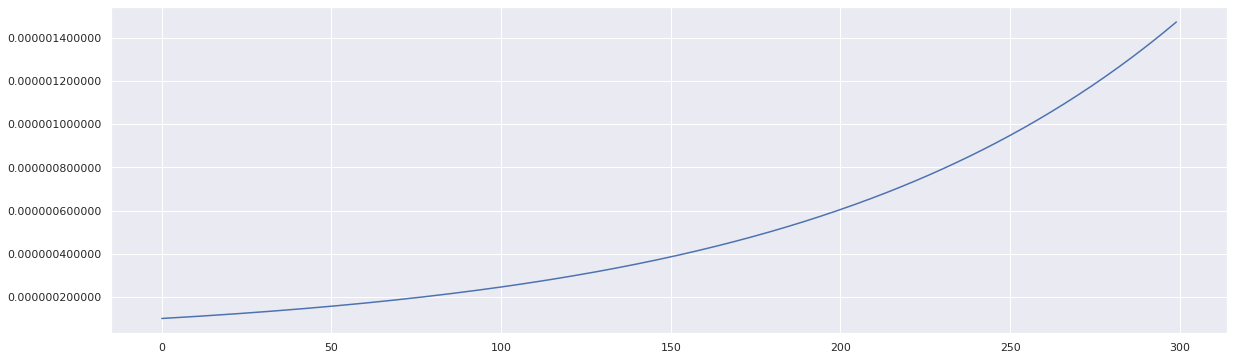

In [3]:
# ##  One cycle lr with period lr searching ![image.png](attachment:image.png)

from matplotlib.ticker import FormatStrFormatter

def decay(epoch):
   initial_lrate = 0.0000001
   k = 0.09
   t = epoch * 0.1
   lrate = initial_lrate * np.exp(k*t) # t is iteration number. (+k)
   return lrate

# # step decay
# def decay(epoch):
#    initial_lrate = base_learning_rate
#    drop = 0.5
#    epochs_drop = 20.0
#    lrate = initial_lrate * tf.math.pow(drop, tf.math.floor((1+epoch)/epochs_drop))
#    return lrate

ep_num = 300

rng = [i for i in range(ep_num)]
y = [decay(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.12f'))
plt.plot(rng, y)

print("e0    lr:", y[0])
print("e50   lr:", y[50])
print("e100  lr:", y[100])
print("e150  lr:", y[150])
print("e200  lr:", y[200])
print("e250  lr:", y[250])
print("e300  lr:", y[300-1])

e0    lr: 1e-07
e50   lr: 9.487735836358526e-07
e100  lr: 9.001713130052181e-06
e150  lr: 8.540587625261514e-05
e200  lr: 0.0008103083927575383
e250  lr: 0.0076879919764677755
e300  lr: 0.06973202127822437


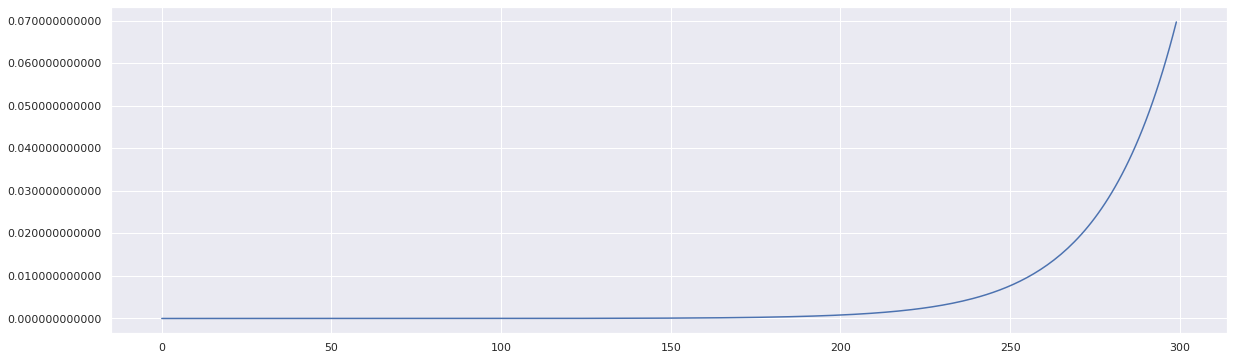

In [4]:
# exponential decay (todo) 這個參數上升太慢
# ##  One cycle lr with period lr searching ![image.png](attachment:image.png)

from matplotlib.ticker import FormatStrFormatter

def decay(epoch):
   initial_lrate = 0.0000001
   k = 0.09
   t = epoch * 0.5
   lrate = initial_lrate * np.exp(k*t) # t is iteration number. (+k)
   return lrate

# # step decay
# def decay(epoch):
#    initial_lrate = base_learning_rate
#    drop = 0.5
#    epochs_drop = 20.0
#    lrate = initial_lrate * tf.math.pow(drop, tf.math.floor((1+epoch)/epochs_drop))
#    return lrate

ep_num = 300

rng = [i for i in range(ep_num)]
y = [decay(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.12f'))
plt.plot(rng, y)

print("e0    lr:", y[0])
print("e50   lr:", y[50])
print("e100  lr:", y[100])
print("e150  lr:", y[150])
print("e200  lr:", y[200])
print("e250  lr:", y[250])
print("e300  lr:", y[300-1])



In [5]:
print('{} ~ {}'.format(min(y), max(y)))

1e-07 ~ 0.06973202127822437


In [6]:
for e, lr in zip(rng,y):
    print('{}\t {}\n'.format(e, lr))

0	 1e-07

1	 1.0460278599087169e-07

2	 1.0941742837052103e-07

3	 1.1445367843513145e-07

4	 1.1972173631218102e-07

5	 1.2523227161918643e-07

6	 1.3099644507332472e-07

7	 1.3702593109569968e-07

8	 1.4333294145603402e-07

9	 1.4993025000567668e-07

10	 1.5683121854901685e-07

11	 1.640498239057044e-07

12	 1.7160068621848585e-07

13	 1.7949909856399e-07

14	 1.877610579264343e-07

15	 1.964032975969847e-07

16	 2.0544332106438874e-07

17	 2.1489943746552202e-07

18	 2.2479079866764712e-07

19	 2.351374380574902e-07

20	 2.4596031111569494e-07

21	 2.572813378588326e-07

22	 2.691234472349262e-07

23	 2.8151062356240634e-07

24	 2.944679551065524e-07

25	 3.080216848918031e-07

26	 3.2219926385284993e-07

27	 3.3702940643216067e-07

28	 3.525421487365382e-07

29	 3.6876890937050163e-07

30	 3.8574255306969737e-07

31	 4.0349745726322027e-07

32	 4.2206958169965523e-07

33	 4.414965412778577e-07

34	 4.618176822299781e-07

35	 4.830741618110278e-07

36	 5.053090316563867e-07

37	 5.2

LR decay curve
e0    lr: 0.0001
e100  lr: 6.065306597126335e-05
e500  lr: 8.20849986238988e-06
e1000 lr: 6.737946999085468e-07
e2000 lr: 4.56274978574346e-09


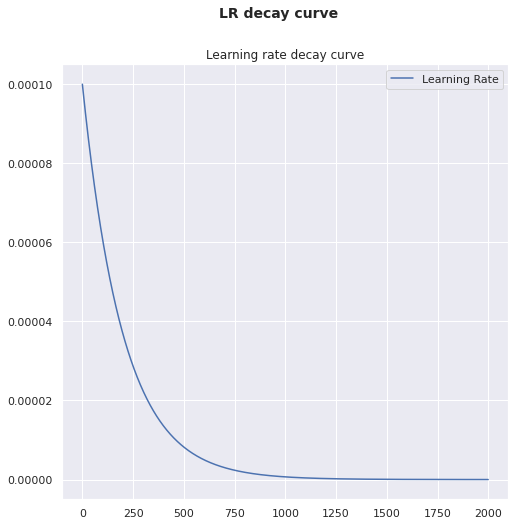

In [7]:


# exponential decay (todo)
def decay(epoch):
   initial_lrate = 0.0001
   k = 0.1
   t = epoch * 0.05
   lrate = initial_lrate * np.exp(-k*t) # t is iteration number.  (-k)
   return lrate

# # step decay
# def decay(epoch):
#    initial_lrate = base_learning_rate
#    drop = 0.5
#    epochs_drop = 20.0
#    lrate = initial_lrate * tf.math.pow(drop, tf.math.floor((1+epoch)/epochs_drop))
#    return lrate


fig = plt.figure(figsize=(8, 8), num='model_name')
fig.suptitle("LR decay curve", fontsize=14, fontweight='bold')
print("LR decay curve")

num_epoch = range(2000)
num_lr = []
for epoch in range(2000):
    num_lr.append(decay(epoch))
#     print(decay(epoch))

plt.plot(num_epoch, num_lr, label='Learning Rate')
# plt.ylim([0.000000000001, 1])
plt.legend(loc='upper right')
plt.title('Learning rate decay curve')

print("e0    lr:", num_lr[0])
print("e100  lr:", num_lr[100])
print("e500  lr:", num_lr[500])
print("e1000 lr:", num_lr[1000])
print("e2000 lr:", num_lr[2000 - 1])



In [8]:
NUM_replicas_in_sync =1
BATCH_SIZE = 64

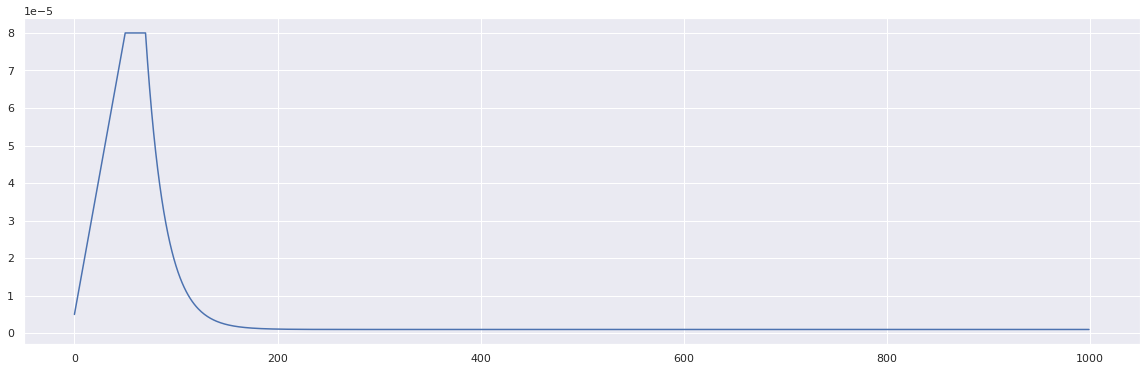

In [9]:
"""lr from kaggle leaf"""
ep_num = 1000



def lrfn2(epoch):
    
    lr_start   = 0.000005
    # lr_max     = 0.00000125 * strategy.num_replicas_in_sync * BATCH_SIZE
    lr_max     = 0.00000125 * NUM_replicas_in_sync * BATCH_SIZE
    lr_min     = 0.000001
    lr_ramp_ep = 50
    lr_sus_ep  = 20
    lr_decay   = 0.95


    if epoch < lr_ramp_ep:
        lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start

    elif epoch < lr_ramp_ep + lr_sus_ep:
        lr = lr_max

    else:
        lr = (lr_max - lr_min) * lr_decay**(epoch - lr_ramp_ep - lr_sus_ep) + lr_min

    return lr



rng = [i for i in range(ep_num)]
y = [lrfn2(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

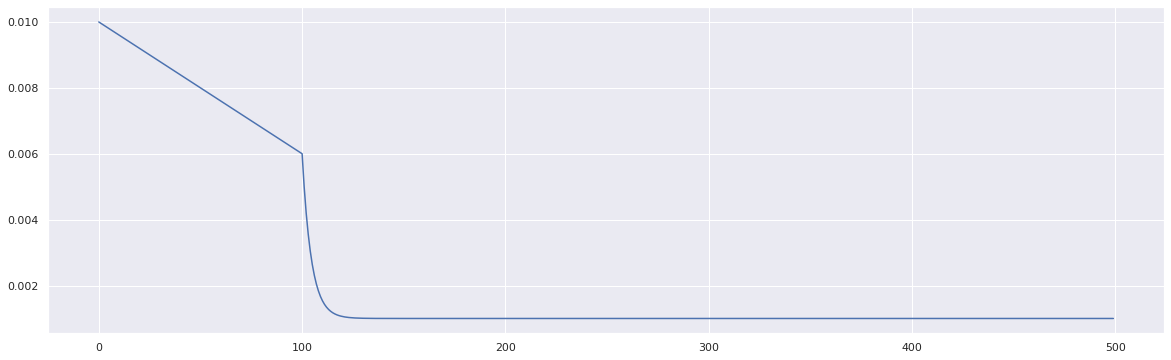

In [10]:
"""dump lr
"""
ep_num = 500

step_size = 100
lr_max = 0.006
lr_min = 0.001
lr_start = 0.01

lr_init_ep = 0
lr_ramp_ep = 100
lr_sus_ep  = 0
lr_decay   = 0.8

def lrdump(epoch):
    if lr_init_ep -1 < epoch < lr_ramp_ep:
        lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start

    elif epoch < lr_ramp_ep + lr_sus_ep:
        lr = lr_max

    else:
        lr = (lr_max - lr_min) * lr_decay**(epoch - lr_ramp_ep - lr_sus_ep) + lr_min

    return lr

rng = [i for i in range(ep_num)]
y = [lrdump(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

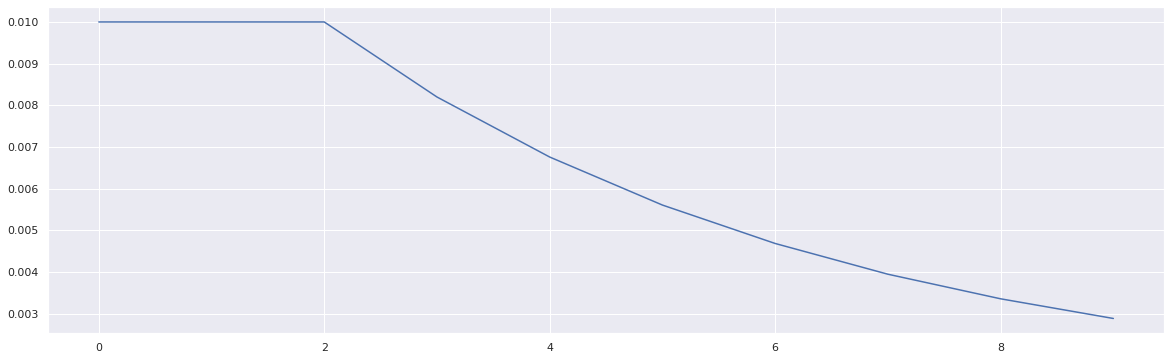

In [11]:
"""drop hold lr
"""
ep_num = 10

step_size = 5
lr_max = 0.01
lr_min = 0.001
lr_start = 0.01

lr_init_ep = 0
lr_ramp_ep = 2
lr_sus_ep  = 0
lr_decay   = 0.8

def lrdrophold(epoch):
    if lr_init_ep -1 < epoch < lr_ramp_ep:
        lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start

    elif epoch < lr_ramp_ep + lr_sus_ep:
        lr = lr_max

    else:
        lr = (lr_max - lr_min) * lr_decay**(epoch - lr_ramp_ep - lr_sus_ep) + lr_min

    return lr

rng = [i for i in range(ep_num)]
y = [lrdrophold(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

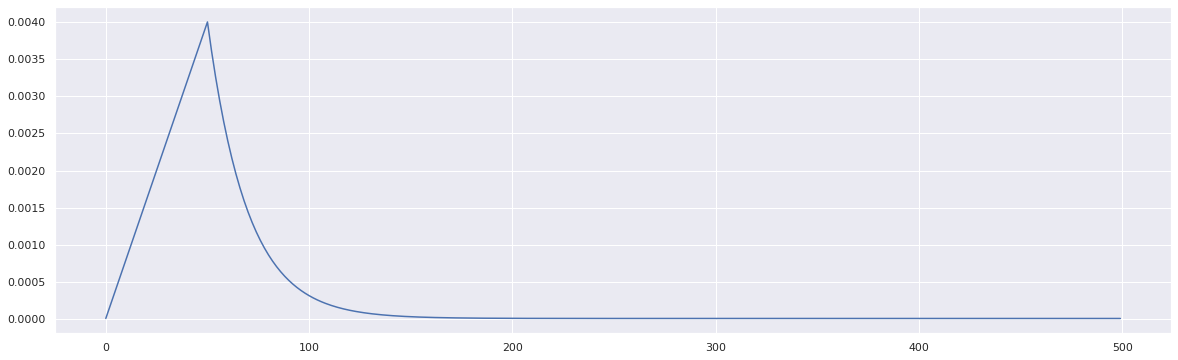

In [12]:
"""dump lr (Epochwise: callback)
"""
ep_num_transf = 500



def lrdump(epoch):
    
    #step_size = 100
    lr_max = 0.004
    lr_min = 0.00001
    lr_start = 0.00001

    lr_init_ep = 0
    lr_ramp_ep = 50
    lr_sus_ep  = 0 #10
    lr_decay   = 0.95

    
    # warm up
    if epoch < lr_init_ep:
        lr = (lr_max - lr_min) / lr_ramp_ep * epoch + lr_min    
        
    elif lr_init_ep -1 < epoch < lr_ramp_ep:
        lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start

    elif epoch < lr_ramp_ep + lr_sus_ep:
        lr = lr_max

    else:
        lr = (lr_max - lr_min) * lr_decay**(epoch - lr_ramp_ep - lr_sus_ep) + lr_min

    return lr

rng = [i for i in range(ep_num_transf)]
y = [lrdump(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

In [13]:
print('{} ~ {}'.format(min(y), max(y)))

1e-05 ~ 0.004


In [14]:
for e, lr in zip(rng,y):
    print('{}\t {}\n'.format(e, lr))

0	 1e-05

1	 8.980000000000001e-05

2	 0.00016960000000000003

3	 0.00024940000000000004

4	 0.0003292000000000001

5	 0.0004090000000000001

6	 0.0004888000000000001

7	 0.0005686000000000002

8	 0.0006484000000000001

9	 0.0007282000000000001

10	 0.0008080000000000001

11	 0.0008878000000000002

12	 0.0009676000000000002

13	 0.0010474000000000002

14	 0.0011272000000000003

15	 0.0012070000000000002

16	 0.0012868000000000003

17	 0.0013666000000000004

18	 0.0014464000000000002

19	 0.0015262000000000003

20	 0.0016060000000000002

21	 0.0016858000000000003

22	 0.0017656000000000004

23	 0.0018454000000000003

24	 0.0019252000000000004

25	 0.0020050000000000003

26	 0.0020848000000000004

27	 0.0021646000000000005

28	 0.0022444000000000006

29	 0.0023242000000000007

30	 0.0024040000000000003

31	 0.0024838000000000004

32	 0.0025636000000000005

33	 0.0026434000000000006

34	 0.0027232000000000007

35	 0.0028030000000000004

36	 0.0028828000000000005

37	 0.0029626000000000006

## CLR

https://zhuanlan.zhihu.com/p/350712244

讓學習率在設定好地最大值與最小值之間往復變化，文中提出CLR能夠work的原因在於兩點：（ 1）CLR裡面增大學習率的過程可以幫助損失函數值逃離鞍點；（2）最優的學習率會在設定好的最大值與最小值之間，最優學習率附近的值在整個訓練過程中會被一直使用到。stepsize一般設置為[公式] 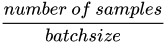 :number of samples/batchsize的2-10倍，一個cycle包括2個stepsize；base_lr一般設置為max_lr的 1/3或者1/4。


在CLR的基礎上，"1cycle"是在整個訓練過程中只有一個cycle，學習率首先從初始值上升至max_lr，之後從max_lr下降至低於初始值的大小。和CosineAnnealingLR不同，OneCycleLR一般每個batch後調用一次。



https://www.jeremyjordan.me/nn-learning-rate/

    Leslie Smith proposes a cyclical learning rate schedule which varies between two bound values. The main learning rate schedule (visualized below) is a triangular update rule, but he also mentions the use of a triangular update in conjunction with a fixed cyclic decay or an exponential cyclic decay.


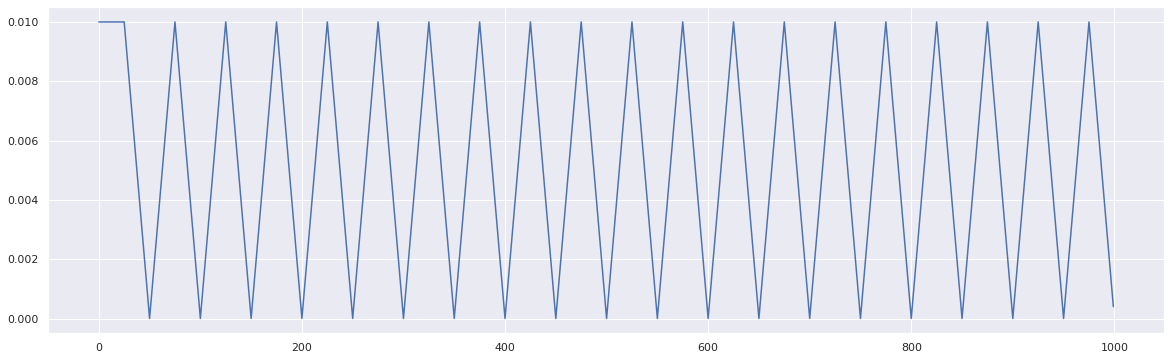

In [15]:

""" simple Cyclical Learning Rate (CLR)
https://www.tensorflow.org/addons/api_docs/python/tfa/optimizers/CyclicalLearningRate
https://github.com/bckenstler/CLR
"""

ep_num = 1000

step_size = 25 # currently best for foot pp
max_lr = 0.01 # currently best for foot pp
base_lr = 0.000001# currently best for foot pp 1e-6

# step_size = 25
# boost_lr = 1e-1
# max_lr = 0.01 #1e-4 #0.01
# base_lr = 0.000001 #1e-12#0.000001
  
def clr(epoch):
    iterations = epoch
    cycle = np.floor(1+iterations/(2*step_size))
    x = np.abs(iterations/step_size - 2*cycle + 1)
    lr = base_lr + (max_lr-base_lr)*np.maximum(0, (1-x))
    
    #todo: boost the lr at initial setps.
    initial_lr = lambda epoch: lr if epoch > step_size else max_lr
#     initial_lr = lambda epoch: lr if epoch > step_size else boost_lr
    lr = initial_lr(epoch)
    #todo: boost the lr at fist step_size.
    
#     decay = ((epoch+1)/ep_num)
#     base_part = 1.01 #1.1
#     print(decay)
#     return lr* (base_part-decay)

    return lr


rng = [i for i in range(ep_num)]
y = [clr(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

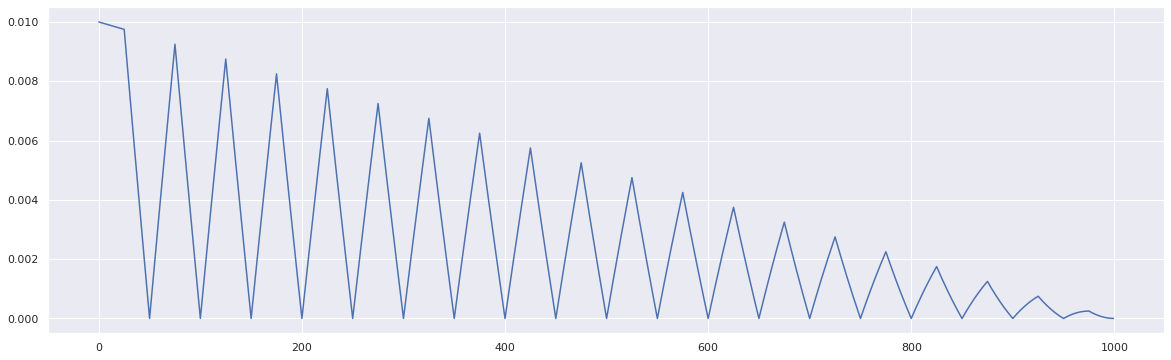

In [16]:

ep_num = 1000

step_size = 25 # currently best for foot pp
max_lr = 0.01 # currently best for foot pp
base_lr = 0.000001# 1e-6 1e-7

def clr2(epoch):
    iterations = epoch
    cycle = np.floor(1+iterations/(2*step_size))
    x = np.abs(iterations/step_size - 2*cycle + 1)
    lr = base_lr + (max_lr-base_lr)*np.maximum(0, (1-x))
    
    #todo: boost the lr at initial setps.
    initial_lr = lambda epoch: lr if epoch > step_size else max_lr
#     initial_lr = lambda epoch: lr if epoch > step_size else boost_lr
    lr = initial_lr(epoch)
    #todo: boost the lr at fist step_size.
    
    decay = ((epoch+1)/ep_num)
    base_part = 1.001 #1.1
#     print(decay)
    return lr* (base_part-decay)


rng = [i for i in range(ep_num)]
y = [clr2(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

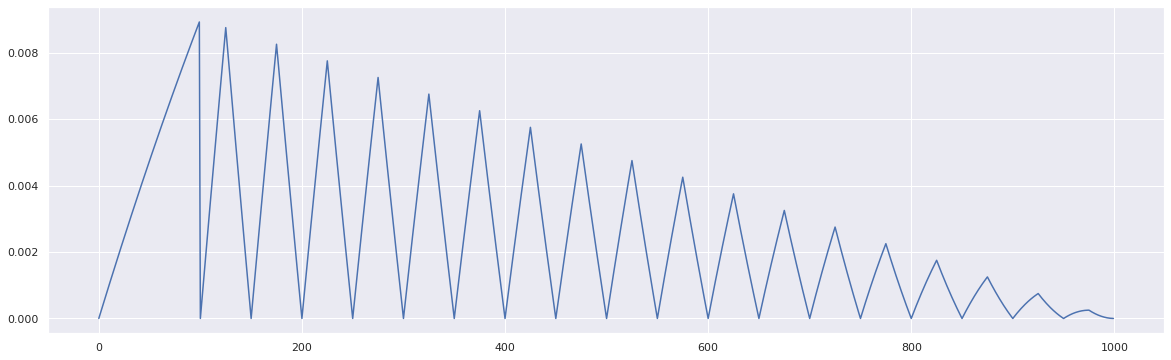

In [17]:
# clr3
# warm up 10% of epoch: it can reduce fall in local min in inital steps.


ep_num = 1000

step_size = 25 # currently best for foot pp
max_lr = 0.01 # currently best for foot pp
base_lr = 0.000001# 1e-6 1e-7

# warm up
lr_init_ep = 0
lr_ramp_ep = 100
lr_sus_ep  = 0
lr_decay   = 0.8


def clr3(epoch):
    iterations = epoch
    cycle = np.floor(1+iterations/(2*step_size))
    x = np.abs(iterations/step_size - 2*cycle + 1)
    lr = base_lr + (max_lr-base_lr)*np.maximum(0, (1-x))
    
    #todo: boost the lr at initial setps.
#     initial_lr = lambda epoch: lr if epoch > step_size else max_lr
#     initial_lr = lambda epoch: lr if epoch > step_size else boost_lr
#     lr = initial_lr(epoch)
    #todo: boost the lr at fist step_size.
    
    # warm up
    if epoch < lr_ramp_ep:
        lr = (max_lr - base_lr) / lr_ramp_ep * epoch + base_lr
    
    decay = ((epoch+1)/ep_num)
    base_part = 1.001 #1.1
#     print(decay)
    return lr* (base_part-decay)


rng = [i for i in range(ep_num)]
y = [clr3(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

In [18]:
print('{} ~ {}'.format(min(y), max(y)))

4.999999999999993e-08 ~ 0.00891990901


## LinearCosineDecay

In [1]:
# tf.keras.experimental.LinearCosineDecay
# change to tf.keras.optimizers.schedules.CosineDecay and keep in mind, optimizer used steps but alos can feed the peochs.
# or chnage to tf.keras.experimental.CosineDecay also workable.


# def decayed_learning_rate(step):
#   step = min(step, decay_steps)
#   linear_decay = (decay_steps - step) / decay_steps
#   cosine_decay = 0.5 * (
#       1 + cos(pi * 2 * num_periods * step / decay_steps))
#   decayed = (alpha + linear_decay) * cosine_decay + beta
#   return initial_learning_rate * decayed


initial_learning_rate = 0.01
decay_steps = 5
lr_decayed_fn = (
#   tf.keras.experimental.LinearCosineDecay(
#     initial_learning_rate, decay_steps, num_periods=5, alpha=0.0, beta=0.001,))
      tf.keras.optimizers.schedules.CosineDecay(
          initial_learning_rate, 
          decay_steps, 
          alpha=0.0, # Minimum learning rate value 
          name="opt.schedules.cosinedecay")
        )

ep_num = 20
rng = [i for i in range(ep_num)]
y = [lr_decayed_fn(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

NameError: name 'tf' is not defined

In [ ]:
#tf.keras.experimental.CosineDecay

# def decayed_learning_rate(step):
#   step = min(step, decay_steps)
#   cosine_decay = 0.5 * (1 + cos(pi * step / decay_steps))
#   decayed = (1 - alpha) * cosine_decay + alpha
#   return initial_learning_rate * decayed

initial_learning_rate = 0.01
decay_steps = 1000
lr_decayed_fn = tf.keras.experimental.CosineDecay(
    initial_learning_rate, decay_steps=decay_steps, alpha=0.0)


rng = [i for i in range(ep_num)]
y = [lr_decayed_fn(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)


In [ ]:
# flat + cosine anneal

ep_num = 1000




def lrfca(epoch):
    lr_init_ep = 100

    initial_learning_rate = 0.01
    decay_steps = 100
    lr_decayed_fn = tf.keras.experimental.CosineDecay(
                    initial_learning_rate, decay_steps=decay_steps, alpha=0.01)

    if epoch < lr_init_ep:
        lr = initial_learning_rate
    else:
        lr = lr_decayed_fn(epoch-decay_steps)
        
    return lr
    

rng = [i for i in range(ep_num)]
y = [lrfca(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

## warm + cosine decay + restart

    warm is no the warm-up !!
    
    warm start from maximal lr.
    
    warm-up measns lr will increase from samll initial lr.
    

In [ ]:
# decayed_learning_rate : warm up + cosine decay + restart
# warm up 10% of epoch: it can reduce fall in local min in inital steps.
#  cosine decay 

from math import cos,pi

ep_num = 1000

step_size = 25 # currently best for foot pp
max_lr = 0.01 # currently best for foot pp
base_lr = 0.000001# 1e-6 1e-7

# warm up
lr_init_ep = 0
lr_ramp_ep = 100
lr_sus_ep  = 0
lr_decay   = 0.8

#LinearCosineDecay
decay_steps = 1000
num_periods = 10
alpha = 0
beta = 0
initial_learning_rate = 1e-2

# #CosineDecay
# lr_decayed_fn = tf.keras.experimental.CosineDecay(
#     initial_learning_rate, decay_steps)

# # LinearCosineDecay
# lr_decayed_fn = (
#   tf.keras.experimental.LinearCosineDecay(
#     initial_learning_rate, decay_steps))


#https://www.tensorflow.org/api_docs/python/tf/keras/experimental/LinearCosineDecay
def decayed_learning_rate(step):
    step = min(step, decay_steps)
    linear_decay = (decay_steps - step) / decay_steps
    cosine_decay = 0.5 * (
      1 + cos(pi * 2 * num_periods * step / decay_steps))
    decayed = (alpha + linear_decay) * cosine_decay + beta
    return initial_learning_rate * decayed




# # https://www.tensorflow.org/api_docs/python/tf/keras/experimental/CosineDecay
# def decayed_learning_rate(step):
#     step = min(step, decay_steps)
#     cosine_decay = 0.5 * (1 + cos(pi * step / decay_steps))
#     decayed = (1 - alpha) * cosine_decay + alpha
#     return initial_learning_rate * decayed


rng = [i for i in range(ep_num)]
y = [decayed_learning_rate(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

In [ ]:
%%time
"""
cosine_decay_restarts是cosine_decay的cycle版本。
first_decay_steps是指第一次完全下降的step數，
t_mul是指每一次循環的步數都將乘以t_mul倍，
m_mul指每一次循環重新開始時的初始lr是上一次循環初始值的m_mul倍。
"""

from matplotlib.ticker import FormatStrFormatter


initial_learning_rate = 1e-2
decay_steps = 1000


lr_decayed_fn = (
  tf.keras.experimental.CosineDecay(
      initial_learning_rate,
      decay_steps,
      alpha = 0.000001,
      name="CCosineCLRDecay"))



rng = [i for i in range(ep_num)]
y = [lr_decayed_fn(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
# plt.ylim(.0000000000000001, .01)# for too large loss
ax.yaxis.set_major_formatter(FormatStrFormatter('%.12f'))# for too small loss
plt.plot(rng, y)

In [ ]:
%%time

"""
2021-12-20
redo lr small epoch test

after tf 250
    AttributeError: module 'tensorflow.keras.experimental' has no attribute 'LinearCosineDecay'

tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate, decay_steps, alpha=0.0, name=None
)
"""

from matplotlib.ticker import FormatStrFormatter


initial_learning_rate = 1e-2
decay_steps = 20


# lr_decayed_fn = (
#   tf.keras.experimental.LinearCosineDecay(
#       initial_learning_rate,
#       decay_steps,
#       num_periods=5.0,
#       alpha = 0.000001,
#       beta = 0.000001,
#       name="CCosineCLRDecay"))

lr_decayed_fn = (
  tf.keras.optimizers.schedules.CosineDecay(
      initial_learning_rate,
      decay_steps,
      alpha = 0.000001,
      name="CCosineCLRDecay"))

ep_num =20
rng = [i for i in range(ep_num)]
y = [lr_decayed_fn(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
# plt.ylim(.0000000000000001, .01)# for too large loss
ax.yaxis.set_major_formatter(FormatStrFormatter('%.12f'))# for too small loss
plt.plot(rng, y)

In [ ]:
%%time
"""
cosine_decay_restarts是cosine_decay的cycle版本。
first_decay_steps是指第一次完全下降的step數，
t_mul是指每一次循環的步數都將乘以t_mul倍，
m_mul指每一次循環重新開始時的初始lr是上一次循環初始值的m_mul倍。
alpha
"""

from matplotlib.ticker import FormatStrFormatter



ep_num = 1000



def CosineDecayCLRWarmUp(epoch):
    
    #step_size = 25 # currently best for foot pp
    max_lr = 1e-3 # currently best for foot pp
    base_lr = 1e-6# 1e-6 1e-7

    # warm up
    lr_init_ep = 0
    lr_ramp_ep = 20
    lr_sus_ep  = 0
    lr_decay   = 0.8


    initial_learning_rate = 1e-3
    first_decay_steps = 20


    lr_decayed_fn = (
      tf.keras.experimental.CosineDecayRestarts(
          initial_learning_rate,
          first_decay_steps,
          t_mul=1.0,
          m_mul=0.8,
          alpha = 0.000001,
          name="CCosineDecayRestarts"))
    
    # warm up
    if epoch < lr_ramp_ep:
        lr = (max_lr - base_lr) / lr_ramp_ep * epoch + base_lr    
    else:
        lr = lr_decayed_fn(epoch)
    return lr



rng = [i for i in range(ep_num)]
y = [CosineDecayCLRWarmUp(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
# plt.ylim(.0000000000000001, .01)# for too large loss
ax.yaxis.set_major_formatter(FormatStrFormatter('%.12f'))# for too small loss
plt.plot(rng, y)

### 修改成快速降低與縮小lr區間，減少無謂的訓練等待。

原始慢板
    max_lr = 1e-2 # currently best for foot pp
    base_lr = 1e-8# 1e-6 1e-7

    # warm up
    lr_init_ep = 0
    lr_ramp_ep = 100
    lr_sus_ep  = 0
    lr_decay   = 0.8


    initial_learning_rate = 1e-2
    first_decay_steps = 100


    lr_decayed_fn = (
      tf.keras.experimental.CosineDecayRestarts(
          initial_learning_rate,
          first_decay_steps,
          t_mul=1.0,
          m_mul=0.8,
          alpha = 0.000001,
          name="CCosineDecayRestarts"))
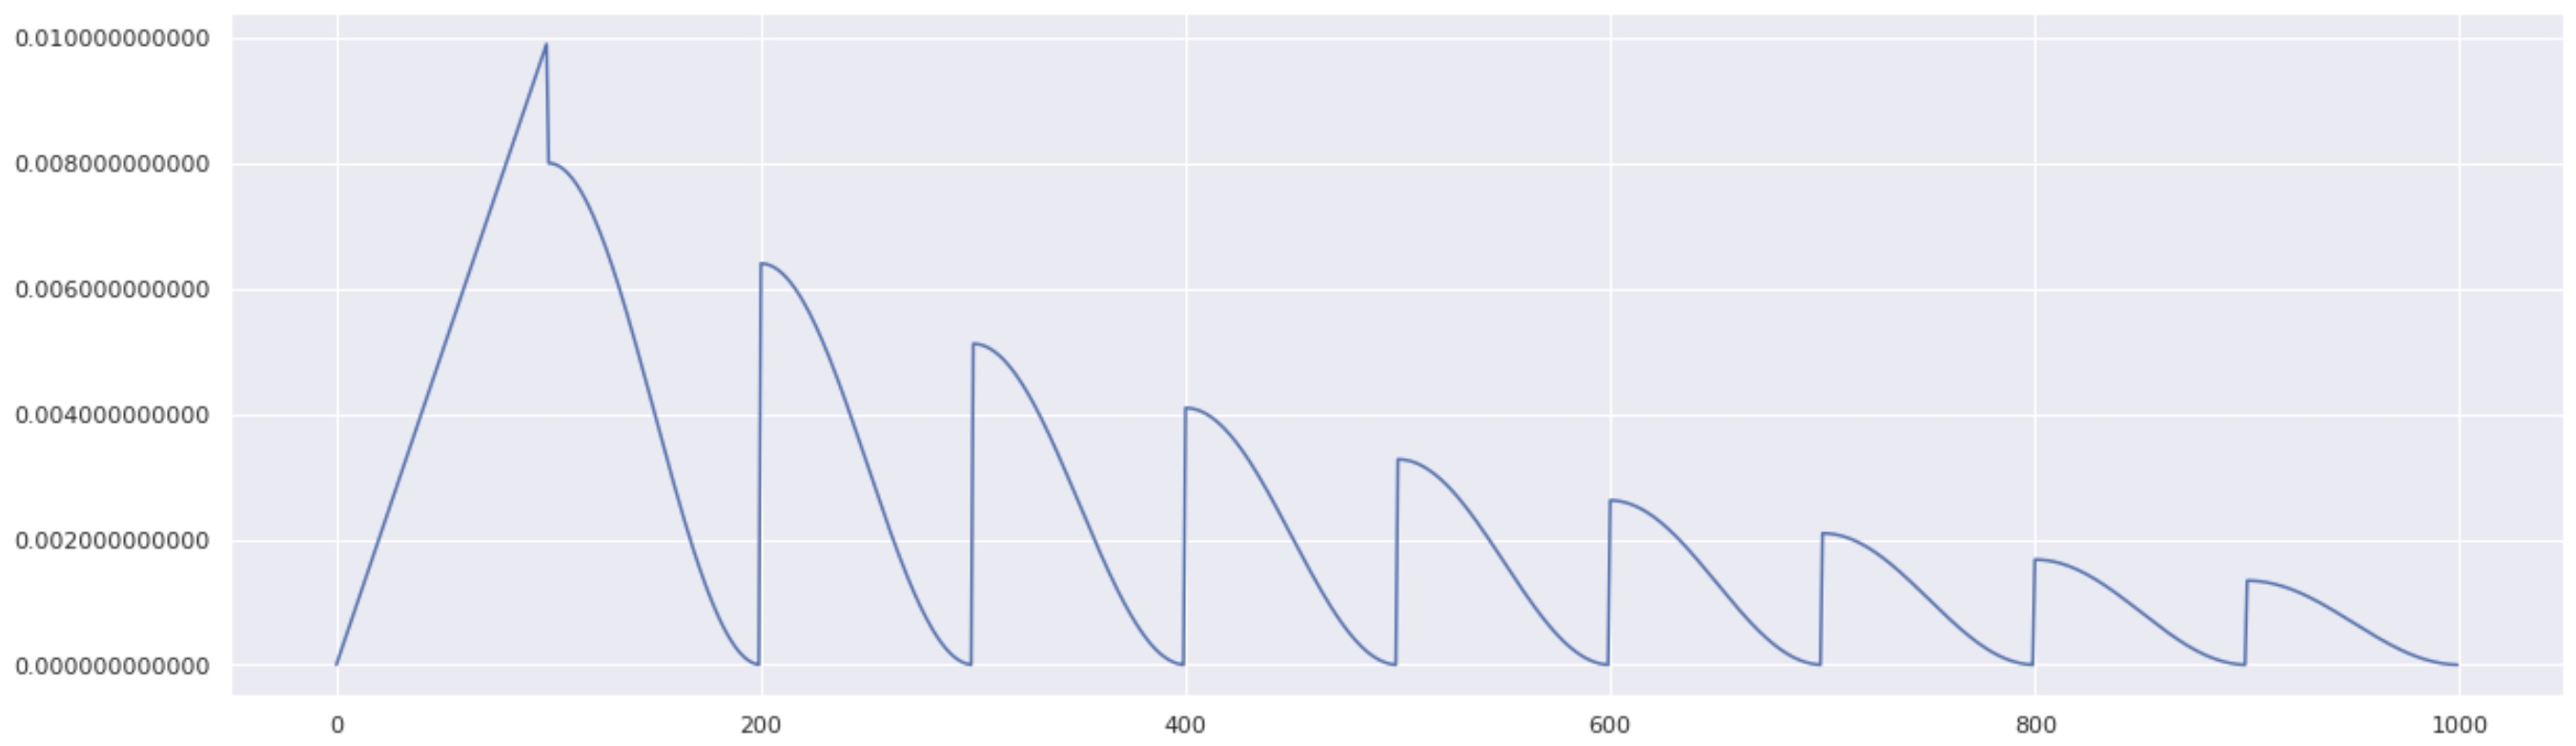


加速版
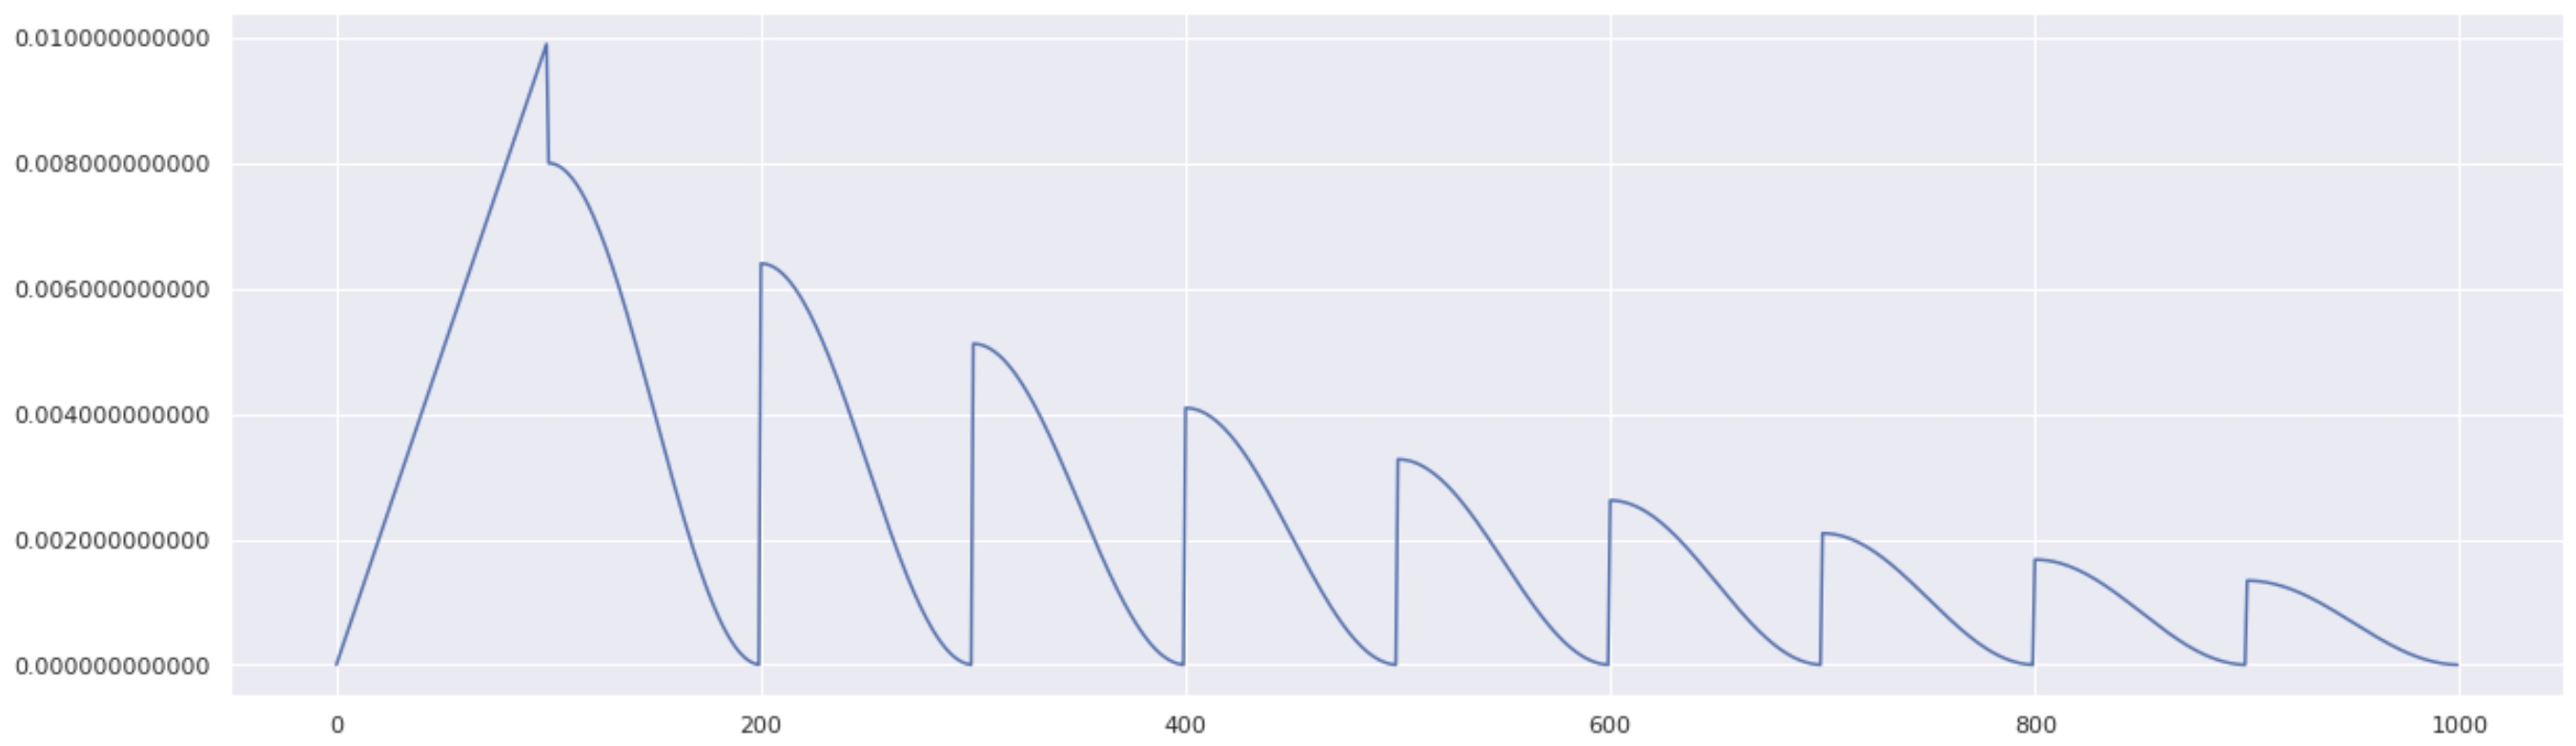

In [ ]:
print('{} ~ {}'.format(min(y), max(y)))

In [ ]:
y

In [ ]:
for e, lr in zip(rng,y):
    print('{}\t {}\n'.format(e, lr))

### The LSW clr version of tf.CosineDecayCLRWarmUp

In [ ]:
%%time
"""
cosine_decay_restarts是cosine_decay的cycle版本。
first_decay_steps是指第一次完全下降的step數，
t_mul是指每一次循環的步數都將乘以t_mul倍，
m_mul指每一次循環重新開始時的初始lr是上一次循環初始值的m_mul倍。
alpha
"""

from matplotlib.ticker import FormatStrFormatter



ep_num = 1000



def CosineDecayCLRWarmUpLSW(epoch):
    
    #step_size = 25 # currently best for foot pp
    max_lr = 1e-3 # currently best for foot pp
    base_lr = 1e-6# 1e-6 1e-7

    # warm up
    lr_init_ep = 0
    lr_ramp_ep = 20
    lr_sus_ep  = 0
    lr_decay   = 0.8


    initial_learning_rate = 1e-3
    first_decay_steps = 50


    lr_decayed_fn = (
      tf.keras.experimental.CosineDecayRestarts(
          initial_learning_rate,
          first_decay_steps,
          t_mul=1.0,
          m_mul=0.8,
          alpha = 0.000001,
          name="CCosineDecayRestarts"))
    
    # warm up
    if epoch < lr_ramp_ep:
        lr = (max_lr - base_lr) / lr_ramp_ep * epoch + base_lr    
    else:
        lr = lr_decayed_fn(epoch-lr_ramp_ep)
    return lr



rng = [i for i in range(ep_num)]
y = [CosineDecayCLRWarmUpLSW(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
# plt.ylim(.0000000000000001, .01)# for too large loss
ax.yaxis.set_major_formatter(FormatStrFormatter('%.12f'))# for too small loss
plt.plot(rng, y)

values = range(0, ep_num+50, 50)

plt.xticks(values, values)

In [ ]:
print('{} ~ {}'.format(min(y), max(y)))

In [ ]:
for i in range(0, 1000, 50):
    print(i)

## Stepwise lr

0. 
WarmUpCosine() need to rewrite the get_config(). 

1.
WCD = WarmUpCosine(
    learning_rate_base=INIT_LR,
    total_steps=TOTAL_STEPS,
    warmup_learning_rate=WAMRUP_LR,
    warmup_steps=WARMUP_STEPS,
)

2.
optimizer = tf.keras.optimizers.Adam(learning_rate=WCD)

3. 
model.compile(optimizer = optimizer),
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
                 metrics=['accuracy'])

In [ ]:
# StepWise warmup cosine decay learning rate [optimazer]

# Reference:
# https://colab.research.google.com/github/sayakpaul/ViT-jax2tf/blob/main/fine_tune.ipynb
# https://www.kaggle.com/ashusma/training-rfcx-tensorflow-tpu-effnet-b2
# https://colab.research.google.com/github/google-research/vision_transformer/blob/linen/vit_jax.ipynb

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

class WarmUpCosine(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(
        self, learning_rate_base, total_steps, warmup_learning_rate, warmup_steps
    ):
        super(WarmUpCosine, self).__init__()

        self.learning_rate_base = learning_rate_base
        self.total_steps = total_steps
        self.warmup_learning_rate = warmup_learning_rate
        self.warmup_steps = warmup_steps
        self.pi = tf.constant(np.pi)

    def __call__(self, step):
        if self.total_steps < self.warmup_steps:
            raise ValueError("Total_steps must be larger or equal to warmup_steps.")
        learning_rate = (
            0.5
            * self.learning_rate_base
            * (
                1
                + tf.cos(
                    self.pi
                    * (tf.cast(step, tf.float32) - self.warmup_steps)
                    / float(self.total_steps - self.warmup_steps)
                )
            )
        )

        if self.warmup_steps > 0:
            if self.learning_rate_base < self.warmup_learning_rate:
                raise ValueError(
                    "Learning_rate_base must be larger or equal to "
                    "warmup_learning_rate."
                )
            slope = (
                self.learning_rate_base - self.warmup_learning_rate
            ) / self.warmup_steps
            warmup_rate = slope * tf.cast(step, tf.float32) + self.warmup_learning_rate
            learning_rate = tf.where(
                step < self.warmup_steps, warmup_rate, learning_rate
            )
        return tf.where(
            step > self.total_steps, 0.0, learning_rate, name="learning_rate"
        )

    # 2021-12-19
    # If use optimizers.schedules.LearningRateSchedule in tf.optimizers and to save full model, need to rewrite the get_config()
    # https://stackoverflow.com/questions/61557024/notimplementederror-learning-rate-schedule-must-override-get-config
    def get_config(self):
        config = {
            'learning_rate_base':self.learning_rate_base,
            'total_steps':self.total_steps,
            'warmup_learning_rate':self.warmup_learning_rate,
            'warmup_steps':self.warmup_steps,
        }    
        return config


In [ ]:
# 2021-12-20

# num_train = tf.data.experimental.cardinality(train_ds_map_s)
# num_val = tf.data.experimental.cardinality(valid_ds_map_s)
num_train = 20000
num_val =1000
print(f"Number of training examples: {num_train}")
print(f"Number of validation examples: {num_val}")

MULTI_BATCH_SIZE=32

EPOCHS = 20
EPOCHS_WARM = 10
TOTAL_STEPS = int((num_train / MULTI_BATCH_SIZE) * EPOCHS)
WARMUP_STEPS = int((num_train / MULTI_BATCH_SIZE) * EPOCHS_WARM) #10 # warmup 2 epochs
INIT_LR = 0.004 #4e-3
WAMRUP_LR = 0.00001 #1e-5

print(f'total step/EPOCHS: {TOTAL_STEPS}/{EPOCHS}, MULTI_BATCH_SIZE:{MULTI_BATCH_SIZE}')

print(f'total step= (num_train / MULTI_BATCH_SIZE) * EPOCHS : {TOTAL_STEPS}=({num_train}/{MULTI_BATCH_SIZE})*{EPOCHS}')

sns.set(style='darkgrid')

darkgrid
dark
whitegrid
white
ticks

In [ ]:
WCD = WarmUpCosine(
    learning_rate_base=INIT_LR,
    total_steps=TOTAL_STEPS,
    warmup_learning_rate=WAMRUP_LR,
    warmup_steps=WARMUP_STEPS,
)


import seaborn as sns

lrs = [WCD(step) for step in range(TOTAL_STEPS)]
sns.set(style='white') # will affect the further plot include plt or sns. 
plt.plot(lrs)
plt.xlabel("Step", fontsize=14)
plt.ylabel("LR", fontsize=14)
plt.show()

In [ ]:
rng = [i for i in range(TOTAL_STEPS)]
y = [WCD(step) for step in rng]
sns.set(style='darkgrid') # will affect the further plot include plt or sns. 
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(rng, y)

# Redo very small epochs learning rate for fine tuning the leaf dataset
2021-12-20
 epoch ~20 is very samll
 
 若代替手寫callback lr: 可使用tf.keras.optimizers.schedules的lr，給tf.keras.callbacks.LearningRateScheduler()使用，也是可以。不過原本的arg參數step就變成是給epoch單位了。
 

# Warmup Cosine decay [for epoch wise]

In [ ]:
# treate step as epoch 

EPOCHS = 20
EPOCHS_WARM = 5

TOTAL_STEPS = EPOCHS
WARMUP_STEPS = EPOCHS_WARM
INIT_LR = 0.001 #4e-3
WAMRUP_LR = 0.00001 #1e-5

WCD = WarmUpCosine(
    learning_rate_base=INIT_LR,
    total_steps=TOTAL_STEPS,
    warmup_learning_rate=WAMRUP_LR,
    warmup_steps=WARMUP_STEPS,
)



lrs = [WCD(step) for step in range(TOTAL_STEPS)]
y = lrs
x = [x for x in range(TOTAL_STEPS)]

sns.set(style='white') # will affect the further plot include plt or sns. 

plt.plot(x,lrs)
plt.xticks(x)

plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Learning rate", fontsize=14)

for a,b in zip(x, y): 
    #plt.text(a, b, str(b))
    plt.scatter(a,b, color='black', alpha=0.2)
    plt.annotate(f'{b:.8f}',xy=(a,b)) # offest text:, xytext=(10,10), textcoords='offset points'


plt.show()

In [ ]:
for e, lr in zip(x,y):
    print('{}\t {}\n'.format(e, lr))

# Warmup Cosine decay restart

In [ ]:
%%time
"""
cosine_decay_restarts是cosine_decay的cycle版本。
first_decay_steps是指第一次完全下降的step數，
t_mul是指每一次循環的步數都將乘以t_mul倍，
m_mul指每一次循環重新開始時的初始lr是上一次循環初始值的m_mul倍。
alpha最小學習率值作為 initial_learning_rate 的一部分
"""

from matplotlib.ticker import FormatStrFormatter



ep_num = 20



def CosineDecayCLRWarmUpLSW(epoch):
    
    #step_size = 25 # currently best for foot pp
    max_lr = 1e-3 # currently best for foot pp
    base_lr = 1e-6# 1e-6 1e-7

    # warm up
    lr_init_ep = 0
    lr_ramp_ep = 5
    lr_sus_ep  = 0
    lr_decay   = 0.8


    initial_learning_rate = 1e-3
    first_decay_steps = 3


    lr_decayed_fn = (
      tf.keras.experimental.CosineDecayRestarts(
          initial_learning_rate,
          first_decay_steps,
          t_mul=1.0,
          m_mul=0.8,
          alpha = initial_learning_rate,
          name="CCosineDecayRestarts"))
    
    # warm up
    if epoch < lr_ramp_ep:
        lr = (max_lr - base_lr) / lr_ramp_ep * epoch + base_lr    
    else:
        lr = lr_decayed_fn(epoch-lr_ramp_ep)
    return lr



rng = [i for i in range(ep_num)]
y = [CosineDecayCLRWarmUpLSW(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
# plt.ylim(.0000000000000001, .01)# for too large loss
ax.yaxis.set_major_formatter(FormatStrFormatter('%.12f'))# for too small loss
plt.plot(rng, y)
plt.xticks(rng)

for a,b in zip(rng, y): 
    #plt.text(a, b, str(b))
    plt.scatter(a,b, color='black', alpha=0.2)
    plt.annotate(f'{b:.8f}',xy=(a,b)) # offest text:, xytext=(10,10), textcoords='offset points'
    
# values = range(0, ep_num, 50)

# plt.xticks(values, values)

## Warm Cosine decay restart

In [ ]:
"""
cosine_decay_restarts是cosine_decay的cycle版本。
first_decay_steps是指第一次完全下降的step數，
t_mul是指每一次循環的步數都將乘以t_mul倍，
m_mul指每一次循環重新開始時的初始lr是上一次循環初始值的m_mul倍。
alpha最小學習率值作為 initial_learning_rate 的一部分
"""


from matplotlib.ticker import FormatStrFormatter



ep_num = 20



# def CosineDecayCLRWarmUpLSW(epoch):
    
#     initial_learning_rate = 1e-4
#     first_decay_steps = 3


#     lr_decayed_fn = (
#       tf.keras.experimental.CosineDecayRestarts(
#           initial_learning_rate,
#           first_decay_steps,
#           t_mul=1.0,
#           m_mul=.9,
#           alpha = initial_learning_rate,
#           name="CCosineDecayRestarts"))
    
#     # warm
#     return lr_decayed_fn(epoch)


initial_learning_rate = 1e-5
first_decay_steps = 5

CosineDecayCLRWarmUpLSW = tf.keras.experimental.CosineDecayRestarts(
          initial_learning_rate,
          first_decay_steps,
          t_mul=1.0,
          m_mul=1.0,
          alpha = initial_learning_rate,
          name="CCosineDecayRestarts")

rng = [i for i in range(ep_num)]
y = [CosineDecayCLRWarmUpLSW(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
# plt.ylim(.0000000000000001, .01)# for too large loss
ax.yaxis.set_major_formatter(FormatStrFormatter('%.12f'))# for too small loss
plt.plot(rng, y)
plt.xticks(rng)

for a,b in zip(rng, y): 
    #plt.text(a, b, str(b))
    plt.scatter(a,b, color='black', alpha=0.2)
    plt.annotate(f'{b:.8f}',xy=(a,b)) # offest text:, xytext=(10,10), textcoords='offset points'

In [ ]:
print('{} ~ {}'.format(min(y), max(y)))

# 1e-5 ~ 1e-4 對leaf仍太高 lr須小於1e-6 方有效學習

In [ ]:
for ll in y:
    print(ll.numpy())

In [ ]:
## 僅使用tf.keras.callbacks.LearningRateScheduler + 手寫 lr decay